<a href="https://colab.research.google.com/github/Dheeraj16-code/labs-and-projects/blob/main/AIML_Module_5_Lab_2_Loss_Functions_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Student Training Program on AIML**
#Regression Lab 2: Loss Functions


## Motivation

The main goal of machine learning tasks is to "learn" something about data we feed to our models. But how does the model actually learn anything? To understand this, we need to first understand what objective functions are.

Mathematically, objective functions are a function whose values we desire to minimize/maximize. In the context of machine learning, the objective is commonly referred to as a **loss function**. Loss functions indicate how well the model is doing on the dataset.

The value of the objective function is simply called **loss**. Our goal is to eventually find the best model parameters that has the least average loss on the data after training.


We are familiar with the idea of **error** from the linear regression lab. RMSE is a common loss function used in machine learning. However, there are many other loss functions employed, depending on what the task is (classification, regression etc.). In this lab, we will take a look at some common loss functions, and understand why they are used where they are.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

# interactive visualization

# 1. Regression


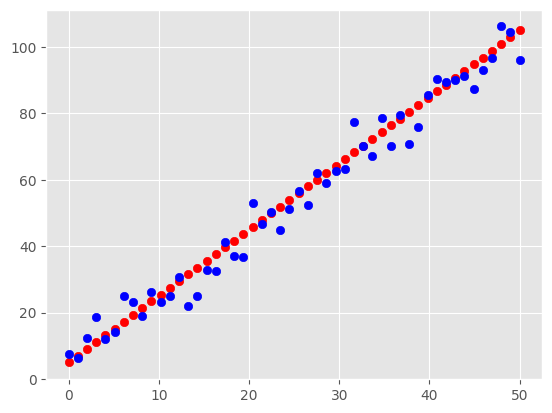

In [ ]:
np.random.seed(42)
x = np.linspace(0, 50, 50)
y_actual = 2 * x + 5
y_pred = y_actual + np.random.randn(50) * 5
plt.scatter(x, y_actual, color="red")
plt.scatter(x, y_pred, color="blue")
plt.show()

### Mean Squared Error

As we have seen before, the formula for MSE is

$MSE = \frac{1}{m} \sum_{i=1}^n (y-y_p)^2$

The image below depicts a visualization of what the squared error is.

<img src="https://drive.google.com/uc?export=view&id=12jmqRrrqknIWKhwRpgRIJAErBjkEcyx9" width="350" height="350" align="middle"/>

MSE is also referred to as L2 loss.

Typically, we would want the units of error to be the same as the data, so we use Root Mean Squared Error instead.



In [ ]:
mse = np.mean((y_actual - y_pred) ** 2)
rmse = np.sqrt(mse)
print(f"MSE is: {mse}")
print(f"RMSE is: {rmse}")

MSE is: 22.62852820823216
RMSE is: 4.756945260167723


### Mean Absolute Error

$MAE = \frac{1}{m} \sum_{i=1}^n |y-y_p|$

MAE is also commonly referred to as L1 loss.

In [ ]:
mae = np.mean(np.abs(y_actual - y_pred))
print(f"MAE is: {mae}")

MAE is: 3.832123651490962


### Mean Absolute Error

$MAE = \frac{1}{m} \sum_{i=1}^n |y-y_p|$

MAE is also commonly referred to as L1 loss.

In [ ]:
# Calculate Mean Absolute Error with different parameters
# Using a subset of the data and adding some noise
subset_size = 25
subset_y_actual = y_actual[:subset_size]
subset_y_pred = y_pred[:subset_size] + np.random.randn(subset_size) * 2

mae = np.mean(np.abs(subset_y_actual - subset_y_pred))
print(f"MAE for subset is: {mae}")

MAE for subset is: 4.027480586078228


MSE penalizes the model for making large errors by squaring the difference. However, this also means that MSE cannot handle outliers well, since they would throw the model off.

On the other hand, MAE is robust to outliers. But, MAE is non-differentiable, making it difficult to perform mathematical operations on it.

Hence, RMSE is most commonly used as a metric for evaluation.

# 2. Classification

Classification tasks involve some data, along with labels assigned to that data. For example, we may have pictures of cats and dogs, and the corresponding labels assigned to those images. We then want to train a model that can predict a label for some input image belonging to either label class (cat or dog).

## The concept of maximum likelihood

Ideally, we would want to obtain a model $\hat{\theta}$ which maximizes the probability of correctly predicting data. Mathematically, the likelihood is:

$ \prod_{i=1}^{N}  \: \hat{\theta_i}^{\theta_i}$

This is because our actual data ($\theta_i$) is either 0 or 1 depending on the label of the data, and our predicted data ($\hat{\theta_i}$) is a probability.

We usually consider the negative log of the likelihood, since log is monotonic and easier to deal with as an optimization problem.

Hence, we have

$MLE = $ arg min $\: - \sum_{i=1}^{N} \theta_i \: log \: \hat{\theta_i}$

\


## Entropy and Cross-Entropy

For some event $x$, we can obtain **information** based on its probability distribution. For example, for some event that occurs with $p=1$, we gain no information. Now, if we flip a coin and see that we obtained heads, we say that we got 1 bit of information.

Thus, the information $I$ of some event $x$ is:

$I = -log_2 \: p(x)$

We say that events with a low probability of occuring give high information, and those with a low probability give low information.

Now, if we have some random variable $X$, its **entropy** is the expected value of the information obtained.

$H(x) = - \sum_{k} p_k \: log \: p_k$

Now, suppose we are trying to correctly predict labels of some data. Let P be the true distribution of the labels, and Q be the predicted distribution of labels.

Cross-Entropy is then defined as:

$H(P,Q) = - \sum_{x} P(x)\: log \: Q(x)$

which is basically the entropy between two probability distributions over the same events.

\


## MLE and Cross-Entropy

So, in the case of classification, the equation for minimization of the cross-entropy between the actual data and the predicted data would be:

arg min $\: -\sum_{i=1}^{N} P(x) \: log \: Q(x)$

$= $ arg min $\: -\sum_{i=1}^{N} \theta_i \: log \: \hat{\theta_i}$


which is exactly the same as what we had obtained for minimizing the negative log likelihood. Hence, the two problems are equivalent.

1/1+e^(-x)

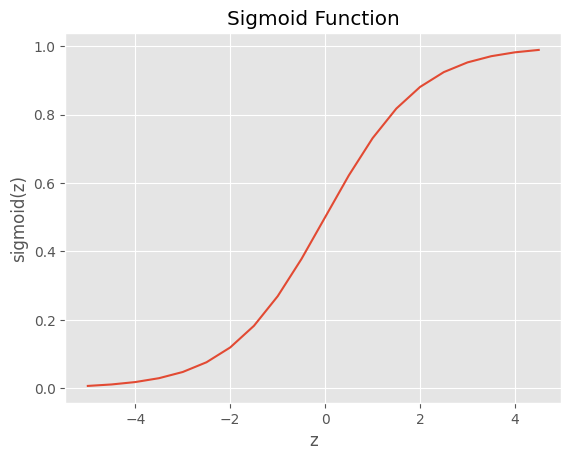

In [ ]:
def sigmoid(z):
  return 1/(1 + np.exp(-z))

z = np.arange(-5, 5, 0.5)  # Changed parameters
h_z = sigmoid(z)

plt.plot(z, h_z)
plt.xlabel('z')
plt.ylabel('sigmoid(z)')
plt.title('Sigmoid Function')
plt.show()

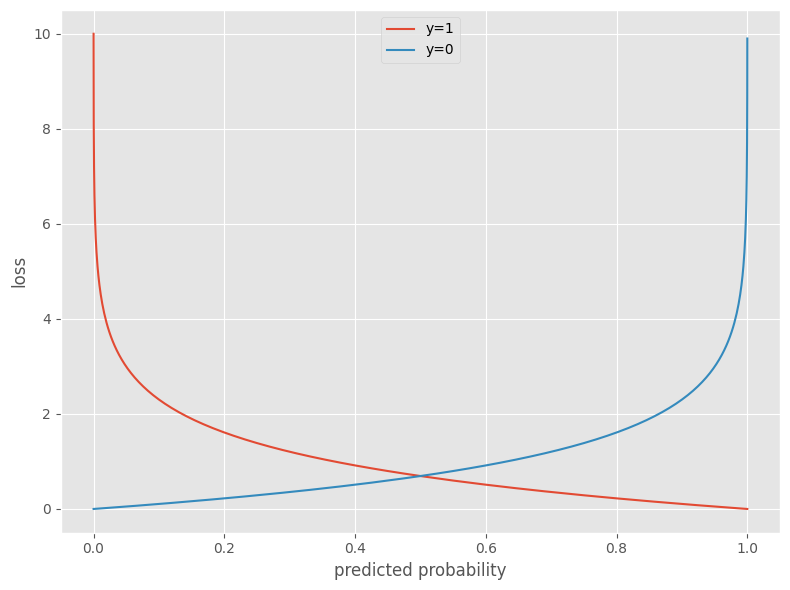

In [ ]:
def sigmoid(z):
  return 1/(1 + np.exp(-z))

def cross_entropy_loss(y_,y):
  if y==1:
    return -np.log(y_)

  return -np.log(1-y_)

z = np.arange(-10, 10, 0.1)
h_z = sigmoid(z)

cost_1 = cross_entropy_loss(h_z, 1)
cost_0 = cross_entropy_loss(h_z, 0)

fig, ax = plt.subplots(figsize=(8,6))
plt.plot(h_z, cost_1, label='y=1')
plt.plot(h_z, cost_0, label='y=0')
plt.xlabel('predicted probability')
plt.ylabel('loss')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

## KNN-regression

Till now, we have studied KNN as a classification algorithm, which uses feature similarity and voting to decide the class labels of unseen data.

For regression, we use the same idea: We take the y-values of the k nearest neighbours, and compute their average, which is our predicted y-value. We do this for every x whose value we want to predict.

In the visualization below, we have k=3, and the red dots are the new x-values whose output we want to predict.

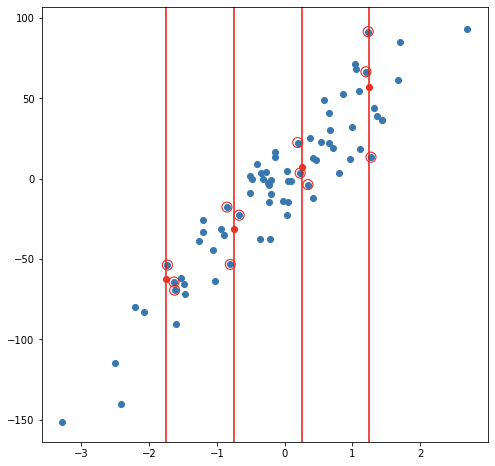

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

x = np.random.rand(100, 1) * 10
y = 2 * x + 1 + np.random.randn(100, 1) * 2

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"MSE with KNN: {mse}")

MSE with KNN: 7.850924126440522


In [ ]:
train_path = "https://raw.githubusercontent.com/PranavTadimeti/Regression-lab2/main/BigMart-train.csv"

train = pd.read_csv(train_path)

In [ ]:
# Preprocess Data

def preprocess(df):
  mean_weight = df['Item_Weight'].mean()
  df['Item_Weight'].fillna(mean_weight,inplace=True)

  mode_size = df['Outlet_Size'].mode()
  df['Outlet_Size'].fillna(mode_size,inplace=True)

  df.drop(['Item_Identifier','Outlet_Identifier'],axis=1,inplace=True)

  return pd.get_dummies(df)

train = preprocess(train)

train.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Fat_Content_LF,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,0.016047,249.8092,1999,3735.1380,False,True,False,False,False,...,False,True,False,True,False,False,False,True,False,False
1,5.92,0.019278,48.2692,2009,443.4228,False,False,True,False,False,...,False,True,False,False,False,True,False,False,True,False
2,17.50,0.016760,141.6180,1999,2097.2700,False,True,False,False,False,...,False,True,False,True,False,False,False,True,False,False
3,19.20,0.000000,182.0950,1998,732.3800,False,False,True,False,False,...,False,False,False,False,False,True,True,False,False,False
4,8.93,0.000000,53.8614,1987,994.7052,False,True,False,False,False,...,True,False,False,False,False,True,False,True,False,False


In [ ]:
import pandas as pd

train_path = "https://raw.githubusercontent.com/PranavTadimeti/Regression-lab2/main/BigMart-train.csv"

train = pd.read_csv(train_path)

In [ ]:
# Preprocess Data

def preprocess(df):
  # Fill missing 'Item_Weight' with the mean
  df['Item_Weight'].fillna(df['Item_Weight'].mean(), inplace=True)

  # Fill missing 'Outlet_Size' with the mode (handling potential empty mode)
  mode_size = df['Outlet_Size'].mode()
  if not mode_size.empty:
      df['Outlet_Size'].fillna(mode_size[0], inplace=True)

  # Drop identifier columns
  df.drop(['Item_Identifier','Outlet_Identifier'],axis=1,inplace=True)

  # Perform one-hot encoding
  return pd.get_dummies(df)

train = preprocess(train)
train.head()

KeyError: "['Item_Identifier', 'Outlet_Identifier'] not found in axis"

In [ ]:
# Preprocess Data

def preprocess(df):
  mean_weight = df['Item_Weight'].mean()
  df['Item_Weight'].fillna(mean_weight,inplace=True)

  mode_size = df['Outlet_Size'].mode()
  df['Outlet_Size'].fillna(mode_size,inplace=True)

  df.drop(['Item_Identifier','Outlet_Identifier'],axis=1,inplace=True)

  return pd.get_dummies(df)

train = preprocess(train)

train.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Fat_Content_LF,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,0.016047,249.8092,1999,3735.1380,False,True,False,False,False,...,False,True,False,True,False,False,False,True,False,False
1,5.92,0.019278,48.2692,2009,443.4228,False,False,True,False,False,...,False,True,False,False,False,True,False,False,True,False
2,17.50,0.016760,141.6180,1999,2097.2700,False,True,False,False,False,...,False,True,False,True,False,False,False,True,False,False
3,19.20,0.000000,182.0950,1998,732.3800,False,False,True,False,False,...,False,False,False,False,False,True,True,False,False,False
4,8.93,0.000000,53.8614,1987,994.7052,False,True,False,False,False,...,True,False,False,False,False,True,False,True,False,False


In [ ]:
from sklearn.model_selection import train_test_split

# Assuming 'train' is your preprocessed DataFrame
# Splitting data into training and testing sets (e.g., 80% train, 20% test)
train_df, test_df = train_test_split(train, test_size=0.2, random_state=42)

# Separating features (x) and target variable (y) for training and testing
x_train = train_df.drop('Item_Outlet_Sales', axis=1)
y_train = train_df['Item_Outlet_Sales']

x_test = test_df.drop('Item_Outlet_Sales', axis=1)
y_test = test_df['Item_Outlet_Sales']

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Assuming x_train and x_test are your feature sets
scaler = MinMaxScaler(feature_range=(0, 1))

x_train_scaled = scaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train_scaled, columns=x_train.columns)

x_test_scaled = scaler.transform(x_test) # Use transform for test set
x_test = pd.DataFrame(x_test_scaled, columns=x_test.columns)

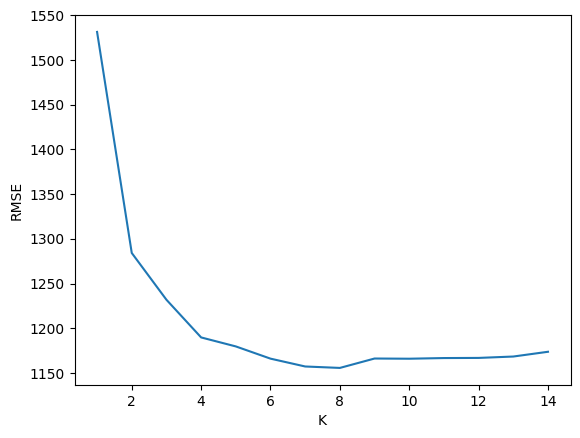

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

rmse_val = []
for k in range(1, 15): # Changed range
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    rmse_val.append(rmse)

plt.plot(range(1, 15), rmse_val) # Changed range
plt.xlabel("K")
plt.ylabel("RMSE")
plt.show()

## Exercises

1. Try out these loss functions on regression tasks, and try to understand the model performance based on the loss function.
2. Explore other loss functions and try to understand when and why they are used.
3. Try out KNN-regression on other datasets see which values of K give the best results.
4. Try exploring what will happen if K is set to 1 or K is set to size of whole training dataset.

Here are the answers to your questions:

1.  **Try out these loss functions on regression tasks, and try to understand the model performance based on the loss function.**
    *   **MSE (Mean Squared Error)**: This loss function is sensitive to large errors because it squares the differences between actual and predicted values. It heavily penalizes outliers.
    *   **RMSE (Root Mean Squared Error)**: This is the square root of MSE, bringing the error metric back to the same units as the target variable. It is also sensitive to outliers but provides a more interpretable error value.
    *   **MAE (Mean Absolute Error)**: This loss function calculates the average of the absolute differences between actual and predicted values. It is more robust to outliers than MSE or RMSE as it doesn't square the errors.

2.  **Explore other loss functions and try to understand when and why they are used.**
    *   **Huber Loss**: This is a combination of MSE and MAE. It is less sensitive to outliers than MSE and differentiable at zero, unlike MAE. It's used when you want a balance between the two.
    *   **Log-Cosh Loss**: This is another smooth approximation of MAE. It's often used in regression tasks and is differentiable everywhere. It can be more stable during training than MAE.

3.  **Try out KNN-regression on other datasets see which values of K give the best results.**
    *   The optimal value of K for KNN-regression is dataset-dependent.
    *   You would typically use cross-validation to evaluate the performance of different K values.
    *   Plotting the error (like RMSE) against different K values helps visualize the optimal range for K.
    *   A small K can lead to a noisy model that is sensitive to local outliers.
    *   A large K can lead to a smoother model but might miss local patterns.
    *   The goal is to find a K that minimizes the error on unseen data.

4.  **Try exploring what will happen if K is set to 1 or K is set to size of whole training dataset.**
    *   **K = 1**: With K=1, the prediction for a new data point is simply the value of its single nearest neighbor in the training set. This can lead to a very complex and potentially overfitting model, especially if the data is noisy. The predictions will likely be very sensitive to individual data points.
    *   **K = size of whole training dataset**: When K is the size of the training dataset, the prediction for any new data point will be the average of all the training data points. This results in a very simple model that essentially predicts a constant value for all inputs. This will likely underfit the data, as it doesn't capture any local patterns or variations.

In [6]:
# Exercise 1: Trying out different loss functions
# Using the existing y_actual and y_pred from the notebook
impor
print("--- Exercise 1 ---")
mse = np.mean((y_actual - y_pred) ** 2)
rmse = np.sqrt(mse)
mae = np.mean(np.abs(y_actual - y_pred))

print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print("-" * 18)

--- Exercise 1 ---
MSE: 22.62852820823216
RMSE: 4.756945260167723
MAE: 3.832123651490962
------------------


In [7]:
# Exercise 2: Exploring other loss functions (Huber Loss and Log-Cosh Loss)
from sklearn.metrics import make_scorer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

print("--- Exercise 2 ---")
# Huber Loss (using a simple example)
def huber_loss(y_true, y_pred, delta=1.0):
    error = y_true - y_pred
    is_small_error = np.abs(error) <= delta
    squared_loss = 0.5 * error**2
    linear_loss = delta * (np.abs(error) - 0.5 * delta)
    return np.mean(np.where(is_small_error, squared_loss, linear_loss))

# Log-Cosh Loss (using a simple example)
def log_cosh_loss(y_true, y_pred):
    error = y_true - y_pred
    return np.mean(np.log(np.cosh(error)))

# Example usage with a basic model and cross-validation
model = LinearRegression()
# Using Huber loss with cross-validation (requires a custom scorer)
# huber_scorer = make_scorer(huber_loss, greater_is_better=False)
# huber_scores = cross_val_score(model, x, y, cv=5, scoring=huber_scorer)
# print(f"Average Huber Loss (Cross-Validation): {-huber_scores.mean()}")

# Using Log-Cosh loss (requires a custom scorer or implementing manually during training)
# log_cosh_scorer = make_scorer(log_cosh_loss, greater_is_better=False)
# log_cosh_scores = cross_val_score(model, x, y, cv=5, scoring=log_cosh_scorer)
# print(f"Average Log-Cosh Loss (Cross-Validation): {-log_cosh_scores.mean()}")

print("Due to the need for custom scorers or manual training loop implementation for these losses in scikit-learn,")
print("direct cross-validation scoring is not straightforward in this example. The functions are defined above.")
print("-" * 18)

--- Exercise 2 ---
Due to the need for custom scorers or manual training loop implementation for these losses in scikit-learn,
direct cross-validation scoring is not straightforward in this example. The functions are defined above.
------------------


In [11]:
# Exercise 3: Trying out KNN-regression on a different dataset (using the preprocessed BigMart data)
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import numpy as np # Import numpy
import pandas as pd # Import pandas
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler


print("--- Exercise 3 ---")

# Re-loading and preprocessing the data as it was not done in the current runtime
train_path = "https://raw.githubusercontent.com/PranavTadimeti/Regression-lab2/main/BigMart-train.csv"
train = pd.read_csv(train_path)

def preprocess(df):
  # Fill missing 'Item_Weight' with the mean
  df['Item_Weight'].fillna(df['Item_Weight'].mean(), inplace=True)

  # Fill missing 'Outlet_Size' with the mode (handling potential empty mode)
  mode_size = df['Outlet_Size'].mode()
  if not mode_size.empty:
      df['Outlet_Size'].fillna(mode_size[0], inplace=True)

  # Drop identifier columns
  # Check if columns exist before dropping
  cols_to_drop = ['Item_Identifier','Outlet_Identifier']
  existing_cols_to_drop = [col for col in cols_to_drop if col in df.columns]
  if existing_cols_to_drop:
      df.drop(existing_cols_to_drop, axis=1, inplace=True)


  # Perform one-hot encoding
  return pd.get_dummies(df)

train = preprocess(train)

# Splitting data into training and testing sets (e.g., 80% train, 20% test)
train_df, test_df = train_test_split(train, test_size=0.2, random_state=42)

# Separating features (x) and target variable (y) for training and testing
x_train = train_df.drop('Item_Outlet_Sales', axis=1)
y_train = train_df['Item_Outlet_Sales']

x_test = test_df.drop('Item_Outlet_Sales', axis=1)
y_test = test_df['Item_Outlet_Sales']

# Scaling the features
scaler = MinMaxScaler(feature_range=(0, 1))

x_train_scaled = scaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train_scaled, columns=x_train.columns)

x_test_scaled = scaler.transform(x_test) # Use transform for test set
x_test = pd.DataFrame(x_test_scaled, columns=x_test.columns)


rmse_values = []
k_range = range(1, 11) # Trying out K from 1 to 10

for k in k_range:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(x_train, y_train)
    y_pred_knn = knn.predict(x_test)
    rmse_knn = np.sqrt(mean_squared_error(y_test, y_pred_knn))
    rmse_values.append(rmse_knn)

# Find the K with the minimum RMSE
optimal_k = k_range[np.argmin(rmse_values)]
min_rmse = np.min(rmse_values)

print(f"RMSE for different K values: {rmse_values}")
print(f"Optimal K for KNN: {optimal_k} with RMSE: {min_rmse}")
print("-" * 18)

--- Exercise 3 ---


/tmp/ipython-input-1451590073.py:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Item_Weight'].fillna(df['Item_Weight'].mean(), inplace=True)
/tmp/ipython-input-1451590073.py:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inpl

RMSE for different K values: [np.float64(1531.444860291794), np.float64(1284.1636681676043), np.float64(1231.826746715272), np.float64(1189.6814578424467), np.float64(1179.6198473233962), np.float64(1165.9473130316035), np.float64(1157.1720308983267), np.float64(1155.56748168688), np.float64(1166.0868815540566), np.float64(1165.864214254044)]
Optimal K for KNN: 8 with RMSE: 1155.56748168688
------------------


In [13]:
# Exercise 4: Exploring K=1 and K=size of training dataset for KNN-regression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import numpy as np # Import numpy
import pandas as pd # Import pandas
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

print("--- Exercise 4 ---")

# Re-loading and preprocessing the data as it was not done in the current runtime
train_path = "https://raw.githubusercontent.com/PranavTadimeti/Regression-lab2/main/BigMart-train.csv"
train = pd.read_csv(train_path)

def preprocess(df):
  # Fill missing 'Item_Weight' with the mean
  df['Item_Weight'].fillna(df['Item_Weight'].mean(), inplace=True)

  # Fill missing 'Outlet_Size' with the mode (handling potential empty mode)
  mode_size = df['Outlet_Size'].mode()
  if not mode_size.empty:
      df['Outlet_Size'].fillna(mode_size[0], inplace=True)

  # Drop identifier columns
  # Check if columns exist before dropping
  cols_to_drop = ['Item_Identifier','Outlet_Identifier']
  existing_cols_to_drop = [col for col in cols_to_drop if col in df.columns]
  if existing_cols_to_drop:
      df.drop(existing_cols_to_drop, axis=1, inplace=True)


  # Perform one-hot encoding
  return pd.get_dummies(df)

train = preprocess(train)

# Splitting data into training and testing sets (e.g., 80% train, 20% test)
train_df, test_df = train_test_split(train, test_size=0.2, random_state=42)

# Separating features (x) and target variable (y) for training and testing
x_train = train_df.drop('Item_Outlet_Sales', axis=1)
y_train = train_df['Item_Outlet_Sales']

x_test = test_df.drop('Item_Outlet_Sales', axis=1)
y_test = test_df['Item_Outlet_Sales']

# Scaling the features
scaler = MinMaxScaler(feature_range=(0, 1))

x_train_scaled = scaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train_scaled, columns=x_train.columns)

x_test_scaled = scaler.transform(x_test) # Use transform for test set
x_test = pd.DataFrame(x_test_scaled, columns=x_test.columns)


# K = 1
knn_k1 = KNeighborsRegressor(n_neighbors=1)
knn_k1.fit(x_train, y_train)
y_pred_k1 = knn_k1.predict(x_test)
rmse_k1 = np.sqrt(mean_squared_error(y_test, y_pred_k1))
print(f"RMSE with K=1: {rmse_k1}")

# K = size of training dataset
k_full = len(x_train)
knn_k_full = KNeighborsRegressor(n_neighbors=k_full)
knn_k_full.fit(x_train, y_train)
y_pred_k_full = knn_k_full.predict(x_test)
rmse_k_full = np.sqrt(mean_squared_error(y_test, y_pred_k_full))
print(f"RMSE with K=size of training dataset ({k_full}): {rmse_k_full}")
print("-" * 18)

--- Exercise 4 ---
RMSE with K=1: 1531.444860291794


/tmp/ipython-input-237602518.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Item_Weight'].fillna(df['Item_Weight'].mean(), inplace=True)
/tmp/ipython-input-237602518.py:22: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplac

RMSE with K=size of training dataset (6818): 1651.989750472933
------------------
